# PROJECT  : Vaccine Prediction


## Compiled by: Mashele G.P

## Data Description
* tweet_id: Unique identifier of the tweet
* safe_tweet: Text contained in the tweet. Some sensitive information has been removed like usernames and urls
* label: Sentiment of the tweet (-1 for negative, 0 for neutral, 1 for positive)
* agreement: The tweets were labeled by three people. Agreement indicates the percentage of the three reviewers that agreed on the given label. You may use this column in your training, but agreement data will not be shared for the test set.

In [ ]:
!pip3 install catboost

### Import the necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To be used for categorical feature selection
from sklearn.feature_selection import chi2
# To oversample and undersample data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from catboost import CatBoostRegressor
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Lets the read the training and testing dataset 
train_data = pd.read_csv('Vaccine_train_data (10).csv')
test_data = pd.read_csv('Vaccine_test_data.csv')

In [4]:
# Print the first five rows of the  train dataset
train_data.head()  

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.000,1.000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.000,1.000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.000,1.000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.000,1.000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.000,1.000


In [5]:
# Print the last five rows of the training dataset
train_data.tail()

,tweet_id,safe_text,label,agreement
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.000,1.000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.000,0.667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.000,1.000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.000,1.000
10000,P6190L3Q,Pneumonia vaccine: for women w risk of pulmona...,1.000,0.667


In [6]:
## Code to print the dimension of the training dataset
train_data.shape

(10001, 4)

In [7]:
print(f" The training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The training dataset consist of 10001 rows and 4 columns


In [8]:
## Code to display the datatypes in the training set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [9]:
## Code to  display the statistical summary for the training dataset
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,10000.000,0.302,0.647,-1.000,0.000,0.000,1.000,1.000
agreement,9999.000,0.854,0.181,0.333,0.667,1.000,1.000,1.000


In [10]:
## Code to print the first five rows of the testing dataset
test_data.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [11]:
### Code to  check for missing values in the dataset
train_data.isnull().sum().sum()

3

### Observation
* There are 1435 missing values in the training dataset

In [12]:
###  Code to check for duplicates in the training dataset
train_data.duplicated().sum()

0

### Observation
* There are  no duplicates present in the training dataset

In [13]:
### Print the first fives rows of the testing dataset
test_data.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [14]:
# Code to display the dataset data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


In [15]:
### Check the dimension of the testing datset
test_data.shape

(5177, 2)

In [16]:
print(f"The tourism testing dataset consist of {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The tourism testing dataset consist of 5177 rows and 2 columns


In [17]:
### Print the statistical summary in the testing dataset
test_data.describe().T

,count,unique,top,freq
tweet_id,5177,5177,00BHHHP1,1
safe_text,5176,5061,<user> #GOP STOP blaming #Immigrants first #Eb...,9


### Observation

In [18]:
### Check for missing values in the testing dataset
test_data.isnull().sum().sum()

1

## Observation
* There are 441 missing values in the testing dataset

In [19]:
### Check for duplicates in the testing dataset
test_data.duplicated().sum()

0

In [20]:
### Make copies of both the training and testing dataset
data = train_data.copy()
data_test = test_data.copy()

In [21]:
data.columns

Index(['tweet_id', 'safe_text', 'label', 'agreement'], dtype='object')

In [22]:
### Now lets drop the ID column in both the training and testing dataset
data = data.drop('agreement',axis=1)

In [23]:
data.head()

,tweet_id,safe_text,label
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.000


In [24]:
data.shape

(10001, 3)

In [25]:
data['label'].value_counts(normalize=True)

label
0.000    0.491
1.000    0.405
-1.000   0.104
0.667    0.000
Name: proportion, dtype: float64

# Exploratory data analysis(EDA)

## Univariate data analysis

### Numerical data

In [26]:
# Code to select the numerical columns from the training dataset
numerical_columns = data.select_dtypes("number").columns

In [27]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))                    # increase the size of the plot
    plt.title(f"Histogram for {item}")           # Give the graph a title
    plt.xlabel(item)                            # set the label on the x-axis
    plt.ylabel("frequency")                     # set the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))                     # increase the size of the plot
    plt.title(f"Boxplot for {item}")               # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);   # Boxplot for numerical dataset
    plt.xlabel(item)                               # set the label on the x-axis
    plt.show()

In [28]:
numerical_columns

Index(['label'], dtype='object')

In [ ]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns]:
    box_histplot(data,item)

### Observation
* About 93% of the predictor/independent variables are skewed to the right/positively skewed with oultiers on the right side of the whiskers.<br>
* The regularity column is skewed to left with no outliers. <br>
* Data preprocessing will be done to remove outliers in the numerical dataset.



## Categorical data analysis:

In [29]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [30]:
categorical_data

Index(['tweet_id', 'safe_text'], dtype='object')

In [ ]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))            # increase the size of the plot
    sns.countplot(data=data , x=item);   # countplot for categorical columns
    plt.title(f"Countplot for {item}")   # add the title on the countplot
    plt.ylabel("frequency")              # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

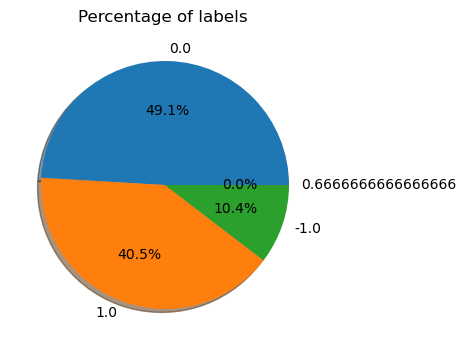

In [31]:
# Create a pie chart to show the percentage for the age group
plt.figure(figsize=(4,5))
values = data["label"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of labels ")
plt.show()

### Split the data into train and validation sets

In [32]:
data1 = data.copy()

In [33]:
data1.head()

,tweet_id,safe_text,label
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.000


In [34]:
data1.columns

Index(['tweet_id', 'safe_text', 'label'], dtype='object')

In [35]:
### Drop the tweet-ID in the training and testing dataset
data1 = data1.drop(columns='tweet_id',axis=1)
data_test = data_test.drop(columns='tweet_id',axis=1)

In [36]:
data1.shape, data_test.shape

((10001, 2), (5177, 1))

In [37]:
# Dividing train data into X and y 
X = data1.drop(['label'], axis=1)
y = data1['label']

In [38]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [39]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 7000 rows and 1 columns


In [40]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 3001 rows and 1 columns


In [41]:
X_train.head()

,safe_text
2603,"<user> sarcasm? If not, you are forgetting it ..."
7738,"OH: ""My kids had vaccines and THEY'RE not reta..."
1579,DeSoto schools remind families to update stude...
5058,Reaction to the immunization. (@ Dean Health -...
5753,So the CDC says the flu vaccine this yr not so...


## Data preprocessing

### Feature engineering

### Dealing with missing Values

In [42]:
X_train.isnull().sum()/X_train.shape[0] *100

safe_text   0.000
dtype: float64

In [43]:
X_val.isnull().sum()/X_val.shape[0] *100

safe_text   0.000
dtype: float64

In [ ]:
## We need to drop columns with missing values greater than 50% in training dataset

In [44]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in data.columns:
    if ((data[item].isnull().sum()/data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

[]


In [45]:
### code to select the numerical columns in the training dataset
train_cols = X_train.select_dtypes("number").columns

In [46]:
train_cols

Index([], dtype='object')

In [47]:
# To impute missing values
from sklearn.impute import SimpleImputer

### Perfom imputation of missing values in the training set

In [48]:
X_train.isnull().sum()

safe_text    0
dtype: int64

In [49]:
X_val.isnull().sum()

safe_text    0
dtype: int64

In [50]:
y_train.isnull().sum()

1

In [51]:
y_val.isnull().sum()

0

In [52]:
X_train[train_cols].isnull().sum().sum()

0.0

In [53]:
y_train = pd.DataFrame(y_train)

In [54]:
y_train.isnull().sum().sum()

1

In [55]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_train = median_imputer.fit_transform(y_train)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0326


### Imputation for categorical columns in the training dataset

In [56]:
### Imputation for categorical columns in the training dataset
## Select categorical columns and perform imputation
categorical_train_cols=X_train.select_dtypes("object").columns

In [57]:
categorical_train_cols

Index(['safe_text'], dtype='object')

### Perfom imputation of missing values in the validation set for numerical columns

In [ ]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

In [58]:
X_val[train_cols].isnull().sum().sum()

0.0

In [59]:
y_val = pd.DataFrame(y_val)

In [60]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_val = median_imputer.fit_transform(y_val)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.008


### Perfom imputation of missing values in the validation set for categorical columns

In [ ]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[categorical_train_cols] = mode_imputer.fit_transform(X_val[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

In [ ]:
X_val[categorical_train_cols].isnull().sum().sum()

In [61]:
data_test.head()

,safe_text
0,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,Students starting school without whooping coug...
2,"I'm kinda over every ep of <user> being ""rippe..."
3,How many innocent children die for lack of vac...
4,"CDC eyeing bird flu vaccine for humans, though..."


In [62]:
X_train.head()

,safe_text
2603,"<user> sarcasm? If not, you are forgetting it ..."
7738,"OH: ""My kids had vaccines and THEY'RE not reta..."
1579,DeSoto schools remind families to update stude...
5058,Reaction to the immunization. (@ Dean Health -...
5753,So the CDC says the flu vaccine this yr not so...


In [63]:
X_train= X_train.sort_index()

In [64]:
X_train.head()

,safe_text
1,I'm 100% thinking of devoting my career to pro...
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y..."
4,Thanks to <user> Catch me performing at La Nui...
5,<user> a nearly 67 year old study when mental ...
6,"Study of more than 95,000 kids finds no link b..."


In [65]:
# Code to sort the index of the dataset
X_val =X_val.sort_index()

In [66]:
X_val.head()

,safe_text
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...
3,I mean if they immunize my kid with something ...
8,Coughing extra on the shuttle and everyone thi...
10,"<user> @ this point I have 2 text, butw/Bon Jo..."
12,Getting my vaccines ! #china #nervous #moving ...


In [67]:
X_train.shape , X_val.shape

((7000, 1), (3001, 1))

In [68]:
data_test.shape

(5177, 1)

In [95]:
# Lets make a copy of the testing dataset
X_test = data_test.copy()

In [98]:
# Code to select the object columns in the testing set
categorical_train_cols1 = X_test.select_dtypes("object").columns

In [99]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_test[categorical_train_cols1] = mode_imputer.fit_transform(X_test[categorical_train_cols1])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.008


In [100]:
X_test.isnull().sum()

safe_text    0
dtype: int64

### Cleaning the testing dataset

In [92]:
X_test =X_test.sort_index()

### Drop unneccessary categorical columns

In [118]:
X_train_copy = X_train.copy()
## Select categorical columns in the train dataset
categorical_columns_train = X_train_copy.select_dtypes("object").columns 

In [119]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       X_train_copy[variable] = pd.factorize(X_train_copy[variable])[0] 

In [120]:
X_train_copy[categorical_columns_train].head()

,safe_text
1,0
2,1
4,2
5,3
6,4


In [121]:
categorical_data =  X_train_copy[categorical_columns_train]

In [122]:
X_cat_data = categorical_data

In [123]:
### Make copies of the dataset
X_train1 = X_train.copy()
X_val1 = X_val.copy()
X_test1 =X_test.copy()

In [124]:
# Select categorical columns in the training set
categorical_columns_train1 = X_train1.select_dtypes("object").columns 

In [125]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train1:
    
        X_train1[variable] = pd.factorize(X_train1[variable])[0] 
        X_val1[variable] = pd.factorize(X_val1[variable])[0] 
        X_test1[variable] = pd.factorize(X_test1[variable])[0] 

## Model Training

## Performance measures description:

In [126]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
        r2 =r2_score(target,pred)
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae,"R2 Score":r2},index=[0],)

        return df_perf

In [127]:
# To help with model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor,BaggingRegressor,)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBRegressor

In [128]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [129]:
from sklearn.model_selection import  cross_val_score

In [130]:
models = {
    "Linear Regression": LinearRegression(),
     "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada boost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost":  XGBRegressor(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train1,y=y_train,scoring=scorer,cv=3)
    print(f"{name} R2-Score: {round(np.mean(scores),4)}")

Linear Regression R2-Score: -0.0016
K-Nearest Neighbors R2-Score: -0.092
Random Forest R2-Score: -0.3323
Bagging R2-Score: -0.3292
Gradient Boosting R2-Score: -0.0125
Ada boost R2-Score: -0.0031
Support Vector Machine R2-Score: -0.102
XGBoost R2-Score: -0.105


In [131]:
## Check the performamce for each model in the training data
linear_train_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_train1,
                        y_train),X_train1,y_train)
kneighbor_train_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_train1,
                        y_train),X_train1,y_train)
randomf_train_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_train1,
                        y_train),X_train1,y_train)
bagging_train_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_train1,
                        y_train),X_train1,y_train)
gradient_train_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_train1,
                        y_train),X_train1,y_train)
adaboost_train_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_train1,
                        y_train),X_train1,y_train)
svm_train_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_train1,
                        y_train),X_train1,y_train)
xgb_train_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_train1,
                        y_train),X_train1,y_train)

In [132]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([ linear_train_perf.T, kneighbor_train_perf.T,randomf_train_perf.T, 
        bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T,xgb_train_perf.T],axis=1,)
models_train_comp_df.columns = ["Linear ","KNeighbor","Random forest","Bagging",
                                "Gradient boost","Adaboost","SVM","XGBoost"]

In [133]:
## Check the performamce for each model in the validation data
linear_val_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_val1,
                        y_val),X_val1,y_val)
kneighbor_val_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_val1,
                        y_val),X_val1,y_val)

randomf_val_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_val1,
                        y_val),X_val1,y_val)
bagging_val_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_val1,
                        y_val),X_val1,y_val)
gradient_val_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_val1,
                        y_val),X_val1,y_val)
adaboost_val_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_val1,
                        y_val),X_val1,y_val)
svm_val_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_val1,
                        y_val),X_val1,y_val)
xgb_val_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_val1,
                        y_val),X_val1,y_val)

In [134]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]


In [135]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


,Linear,KNeighbor,Random forest,Bagging,Gradient boost,Adaboost,SVM,XGBoost
Root Mean Squared error,0.645,0.578,0.306,0.340,0.630,0.647,0.677,0.545
Mean Squared error,0.415,0.334,0.093,0.116,0.397,0.419,0.458,0.297
Mean Absolute error,0.566,0.474,0.241,0.247,0.551,0.552,0.528,0.465
R2 Score,0.000,0.196,0.775,0.722,0.045,-0.008,-0.102,0.285


In [136]:
print("Validation performance measures comparison")
models_validation_comp_df

Validation performance measures comparison


,Linear,KNeighbor,Random forest,Bagging,Gradient boost,Adaboost,SVM,XGBoost
Root Mean Squared error,0.651,0.588,0.309,0.336,0.621,0.654,0.679,0.488
Mean Squared error,0.424,0.346,0.096,0.113,0.386,0.428,0.461,0.238
Mean Absolute error,0.566,0.483,0.245,0.245,0.538,0.550,0.529,0.408
R2 Score,0.002,0.184,0.775,0.733,0.090,-0.008,-0.086,0.440


### XGBoost Regression 

In [137]:
model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=123, reg_alpha=0.1, reg_lambda=1,subsample=0.7)
xgboost_model = model.fit(X_train1,y_train)

In [138]:
## Check the performamce for each model in the training data of the imbalanced data 
xg_train_perf = model_performance_regression_sklearn(xgboost_model,X_train1,y_train)
## Check the performamce for each model in the imbalanced validation data
xg_val_perf= model_performance_regression_sklearn(xgboost_model,X_val1,y_val)

In [139]:
xg_perf = pd.concat([xg_train_perf.T,xg_val_perf.T],axis=1)
xg_perf.columns =["Training","Validation"]

In [140]:
print("XGBoost Peformance measures on the original data")
xg_perf

XGBoost Peformance measures on the original data


,Training,Validation
Root Mean Squared error,0.628,0.657
Mean Squared error,0.394,0.432
Mean Absolute error,0.548,0.569
R2 Score,0.050,-0.017


##  Feature importances

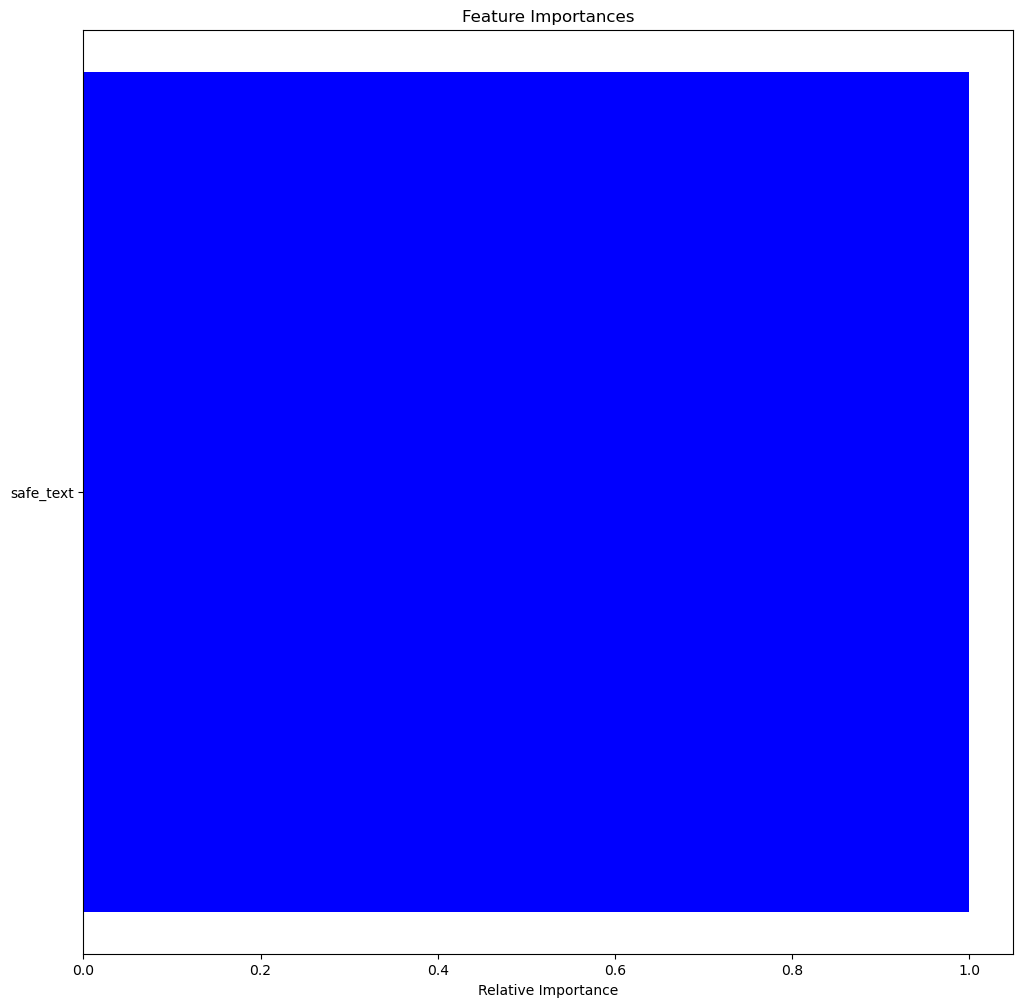

In [141]:
 ## Code to check the feature importance on the best model
feature_names = X_train1.columns
importances =xgboost_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [142]:
test_data.head()

,tweet_id,safe_text,label
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...,0.306
1,00UNMD0E,Students starting school without whooping coug...,0.306
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe...",0.306
3,01HOEQJW,How many innocent children die for lack of vac...,0.306
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though...",0.306


In [143]:
X_test1.shape

(5177, 1)

In [145]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data['label'] = xgboost_model.predict(X_test1)

In [ ]:
test_data.head()

In [146]:
data_df =pd.DataFrame({"tweet_id":test_data["tweet_id"],'label':test_data['label']})

In [147]:
data_df.head()

,tweet_id,label
0,00BHHHP1,0.310
1,00UNMD0E,0.310
2,01AXPTJF,0.310
3,01HOEQJW,0.310
4,01JUKMAO,0.472


In [148]:
data_df.tail()

,tweet_id,label
5172,ZXVVNC5O,0.301
5173,ZYIANVI8,0.301
5174,ZYITEHAH,0.301
5175,ZZ3BMBTG,0.301
5176,ZZIYCVNH,0.301


In [149]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(vaccine1).csv",index=False)   # code to save the predicted values as a csv file

##### Benchmark

### Lightgbm Regression

In [150]:
import lightgbm as lgb

In [151]:
dtrain = lgb.Dataset(X_train1 ,label=y_train)
dvalid = lgb.Dataset(X_val1,label=y_val)

In [163]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'regression' , 'metric':'rmse',
             'is_unbalance':'true', 'boosting':'rf','max_depth':7,'min_data_in_leaf':120,
             'num_leaves':127, 'feature_fraction': 0.5,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.01 ,'verbose': -1    
}

In [164]:
lgb_model = lgb.train(parameter,dtrain,valid_sets=dvalid,num_boost_round=5000,
                      callbacks=[lgb.early_stopping(stopping_rounds=100)])

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[261]	valid_0's rmse: 0.65506


In [165]:
from sklearn.metrics import roc_auc_score

In [166]:
## Check the performamce for each model in the training data of the imbalanced data 
lgb_train_perf = model_performance_regression_sklearn(lgb_model,X_train1,y_train)
## Check the performamce for each model in the imbalanced validation data
lgb_val_perf = model_performance_regression_sklearn(lgb_model,X_val1,y_val)
lgb_perf = pd.concat([lgb_train_perf.T,lgb_val_perf.T],axis=1)
lgb_perf.columns =["Training","Validation"]

In [167]:
print("Peformance measures on the original data")
lgb_perf

Peformance measures on the original data


,Training,Validation
Root Mean Squared error,0.641,0.655
Mean Squared error,0.411,0.429
Mean Absolute error,0.560,0.568
R2 Score,0.010,-0.011


In [169]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data['label'] = lgb_model.predict(X_test1)

In [170]:
data_df2 =pd.DataFrame({"tweet_id":test_data["tweet_id"],'label':test_data['label']})

In [171]:
data_df2.head()

,tweet_id,label
0,00BHHHP1,0.343
1,00UNMD0E,0.343
2,01AXPTJF,0.343
3,01HOEQJW,0.343
4,01JUKMAO,0.343


In [172]:
data_df2.tail()

,tweet_id,label
5172,ZXVVNC5O,0.306
5173,ZYIANVI8,0.306
5174,ZYITEHAH,0.306
5175,ZZ3BMBTG,0.306
5176,ZZIYCVNH,0.306


In [173]:
# code to save the predicted dataset as a csv file
data_df2.to_csv("Submission_file(Vaccine3).csv",index=False) 

In [ ]:
X_train.shape,X_val.shape

In [ ]:
X_test.shape

### CATBOOST REGRESSION

In [102]:
from catboost import CatBoostRegressor

In [103]:
### Code to select all the features on the training dataset
features = list(X_train.columns)

In [104]:
features

['safe_text']

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 1 to 10000
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   safe_text  7000 non-null   object
dtypes: object(1)
memory usage: 109.4+ KB


In [106]:
### Code to select categorical features
cat_features = np.where(X_train.dtypes !=float)[0]

In [107]:
cat_features

array([0], dtype=int64)

In [79]:
### Instantiate the Catboost model
model = CatBoostRegressor( 
                          iterations=5000,
                          eval_metric="RMSE",
                          learning_rate=0.001,
                          depth=4,
                          loss_function ="RMSE",
                          random_seed = 55,    
                          #od_type ='Iter',    # Overfit detector
                          #od_wait = 20,  # most recent best iteration to wait before stopping
                          verbose=True,
                          use_best_model=True,
                         metric_period =20
                         )
### Now fit the model in the training dataset
cat_model = model.fit(X_train,y_train,cat_features= cat_features,use_best_model=True,plot=True,
                     eval_set= (X_val,y_val))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6445591	test: 0.6515842	best: 0.6515842 (0)	total: 43.5ms	remaining: 3m 37s
20:	learn: 0.6445500	test: 0.6515899	best: 0.6515842 (0)	total: 547ms	remaining: 2m 9s
40:	learn: 0.6445394	test: 0.6515976	best: 0.6515842 (0)	total: 1.02s	remaining: 2m 3s
60:	learn: 0.6445290	test: 0.6516051	best: 0.6515842 (0)	total: 1.47s	remaining: 1m 59s
80:	learn: 0.6445217	test: 0.6516094	best: 0.6515842 (0)	total: 1.9s	remaining: 1m 55s
100:	learn: 0.6445143	test: 0.6516143	best: 0.6515842 (0)	total: 2.34s	remaining: 1m 53s
120:	learn: 0.6445069	test: 0.6516182	best: 0.6515842 (0)	total: 2.73s	remaining: 1m 50s
140:	learn: 0.6444983	test: 0.6516233	best: 0.6515842 (0)	total: 3.14s	remaining: 1m 48s
160:	learn: 0.6444883	test: 0.6516307	best: 0.6515842 (0)	total: 3.58s	remaining: 1m 47s
180:	learn: 0.6444795	test: 0.6516368	best: 0.6515842 (0)	total: 4s	remaining: 1m 46s
200:	learn: 0.6444707	test: 0.6516431	best: 0.6515842 (0)	total: 4.57s	remaining: 1m 49s
220:	learn: 0.6444643	test: 0.65

1840:	learn: 0.6439992	test: 0.6520825	best: 0.6515842 (0)	total: 44s	remaining: 1m 15s
1860:	learn: 0.6439943	test: 0.6520870	best: 0.6515842 (0)	total: 44.7s	remaining: 1m 15s
1880:	learn: 0.6439908	test: 0.6520905	best: 0.6515842 (0)	total: 45.2s	remaining: 1m 14s
1900:	learn: 0.6439865	test: 0.6520972	best: 0.6515842 (0)	total: 45.7s	remaining: 1m 14s
1920:	learn: 0.6439835	test: 0.6520989	best: 0.6515842 (0)	total: 46.4s	remaining: 1m 14s
1940:	learn: 0.6439794	test: 0.6521039	best: 0.6515842 (0)	total: 46.9s	remaining: 1m 13s
1960:	learn: 0.6439756	test: 0.6521084	best: 0.6515842 (0)	total: 47.4s	remaining: 1m 13s
1980:	learn: 0.6439733	test: 0.6521103	best: 0.6515842 (0)	total: 47.8s	remaining: 1m 12s
2000:	learn: 0.6439698	test: 0.6521141	best: 0.6515842 (0)	total: 48.2s	remaining: 1m 12s
2020:	learn: 0.6439661	test: 0.6521176	best: 0.6515842 (0)	total: 48.6s	remaining: 1m 11s
2040:	learn: 0.6439623	test: 0.6521226	best: 0.6515842 (0)	total: 49s	remaining: 1m 11s
2060:	learn: 0

3680:	learn: 0.6437069	test: 0.6524512	best: 0.6515842 (0)	total: 1m 25s	remaining: 30.8s
3700:	learn: 0.6437044	test: 0.6524546	best: 0.6515842 (0)	total: 1m 26s	remaining: 30.3s
3720:	learn: 0.6437013	test: 0.6524593	best: 0.6515842 (0)	total: 1m 26s	remaining: 29.8s
3740:	learn: 0.6436986	test: 0.6524626	best: 0.6515842 (0)	total: 1m 27s	remaining: 29.3s
3760:	learn: 0.6436963	test: 0.6524651	best: 0.6515842 (0)	total: 1m 27s	remaining: 28.8s
3780:	learn: 0.6436942	test: 0.6524690	best: 0.6515842 (0)	total: 1m 27s	remaining: 28.3s
3800:	learn: 0.6436918	test: 0.6524723	best: 0.6515842 (0)	total: 1m 28s	remaining: 27.9s
3820:	learn: 0.6436890	test: 0.6524759	best: 0.6515842 (0)	total: 1m 28s	remaining: 27.4s
3840:	learn: 0.6436866	test: 0.6524788	best: 0.6515842 (0)	total: 1m 29s	remaining: 27s
3860:	learn: 0.6436842	test: 0.6524820	best: 0.6515842 (0)	total: 1m 29s	remaining: 26.5s
3880:	learn: 0.6436813	test: 0.6524843	best: 0.6515842 (0)	total: 1m 30s	remaining: 26.1s
3900:	learn:

In [80]:
## Check the performamce for each model in the training data of the imbalanced data 
cat_train_perf = model_performance_regression_sklearn(cat_model,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
cat_val_perf= model_performance_regression_sklearn(cat_model,X_val,y_val)

In [81]:
cat_perf = pd.concat([cat_train_perf.T,cat_val_perf.T],axis=1)
cat_perf.columns =["Training","Validation"]

In [82]:
print("Peformance measures on the original data")
cat_perf

Peformance measures on the original data


,Training,Validation
Root Mean Squared error,0.645,0.652
Mean Squared error,0.415,0.425
Mean Absolute error,0.566,0.570
R2 Score,-0.000,-0.001


### Feature Importance for CatBoost Regression

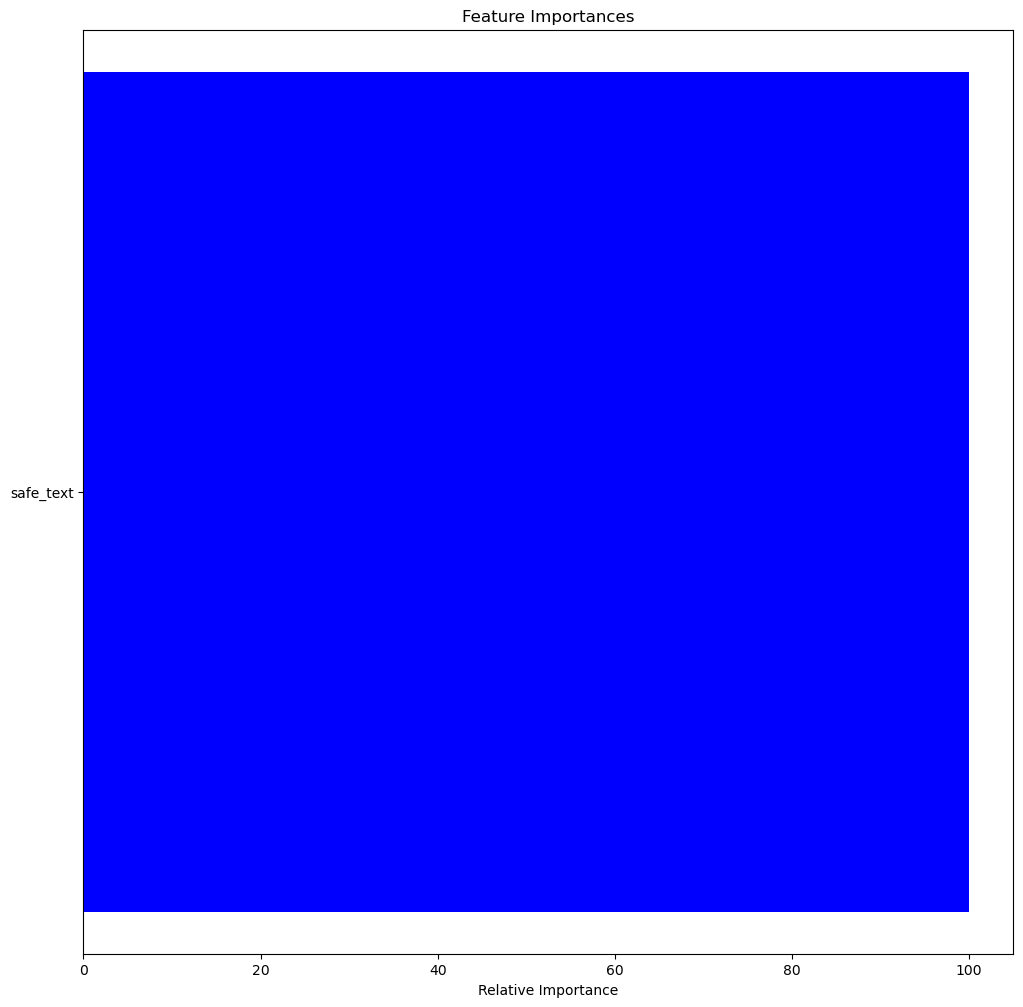

In [83]:
 ## Code to check the feature importance on the best model
feature_names =features
importances =cat_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [84]:
test_data.columns

Index(['tweet_id', 'safe_text'], dtype='object')

In [108]:
X_test.isnull().sum()

safe_text    0
dtype: int64

In [109]:
X_test.isnull().sum()

safe_text    0
dtype: int64

In [110]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data['label'] = cat_model.predict(X_test)

In [111]:
test_data.head()

,tweet_id,safe_text,label
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...,0.306
1,00UNMD0E,Students starting school without whooping coug...,0.306
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe...",0.306
3,01HOEQJW,How many innocent children die for lack of vac...,0.306
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though...",0.306


In [113]:
test_data['label'].value_counts(normalize=True)

label
0.306   0.963
0.306   0.017
0.306   0.012
0.306   0.006
0.306   0.001
0.306   0.001
Name: proportion, dtype: float64

In [114]:
data_df3 =pd.DataFrame({"tweet_id":test_data["tweet_id"],'label':test_data['label']})

In [115]:
data_df3.head()

,tweet_id,label
0,00BHHHP1,0.306
1,00UNMD0E,0.306
2,01AXPTJF,0.306
3,01HOEQJW,0.306
4,01JUKMAO,0.306


In [116]:
data_df3.tail()

,tweet_id,label
5172,ZXVVNC5O,0.306
5173,ZYIANVI8,0.306
5174,ZYITEHAH,0.306
5175,ZZ3BMBTG,0.306
5176,ZZIYCVNH,0.306


In [117]:
# code to save the predicted dataset as a csv file
data_df3.to_csv("Submission_file(Vaccine).csv",index=False)   # code to save the predicted values as a csv file

### Insights and conclusions